In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Original data points
T_vals = np.array([30, 50, 60, 80])
KOH_vals = np.array([1.0, 0.1, 0.01])
T_grid, KOH_grid = np.meshgrid(T_vals, KOH_vals)
X = np.column_stack((T_grid.ravel(), KOH_grid.ravel()))

# j0 values
y_an = np.array([
    [0.014, 0.027, 0.037, 0.035],
    [0.006, 0.020, 0.028, 0.030],
    [0.0003, 0.001, 0.00249, 0.0028]
]).ravel()

y_log = np.log10(y_an)


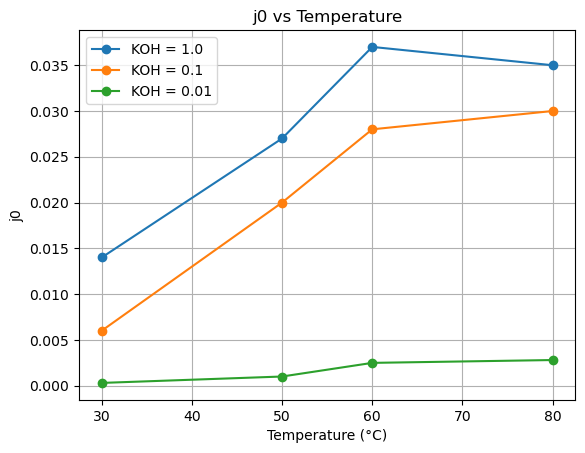

In [37]:
# === Plot 1: j0 vs T, color = KOH ===
plt.figure()
for koh in KOH_vals:
    mask = X[:,1] == koh
    
    plt.plot(X[mask, 0], y_an[mask], marker='o', label=f'KOH = {koh}')
    
plt.xlabel("Temperature (°C)")
plt.ylabel("j0")
plt.title("j0 vs Temperature")
plt.legend()
plt.grid()

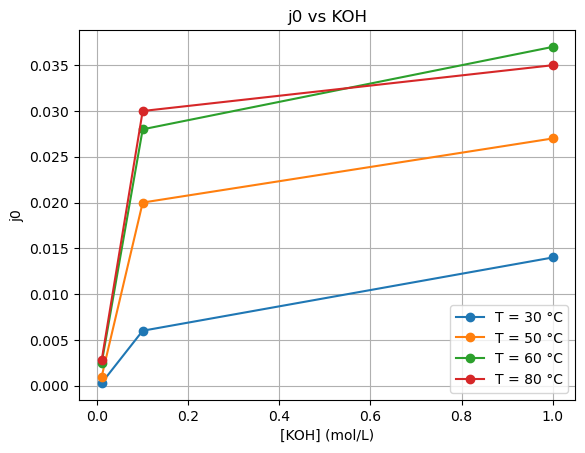

In [38]:
# === Plot 2: j0 vs KOH, color = T ===
plt.figure()
for T in T_vals:
    mask = X[:,0] == T
    plt.plot(X[mask, 1], y_an[mask], marker='o', label=f"T = {T} °C")
plt.xlabel("[KOH] (mol/L)")
plt.ylabel("j0")
plt.title("j0 vs KOH")
plt.legend()
plt.grid()

# Logarithmic

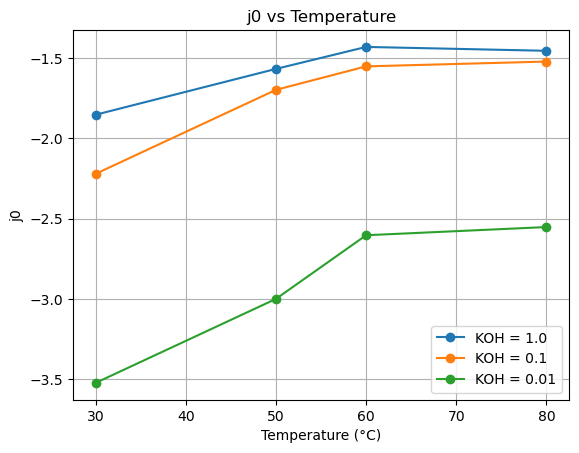

In [49]:
# === Plot 1: j0 vs T, color = KOH ===
plt.figure()
for koh in KOH_vals:
    mask = X[:,1] == koh
    
    plt.plot(X[mask, 0], y_log[mask], marker='o', label=f'KOH = {koh}')
    
plt.xlabel("Temperature (°C)")
plt.ylabel("j0")
plt.title("j0 vs Temperature")
plt.legend()
plt.grid()

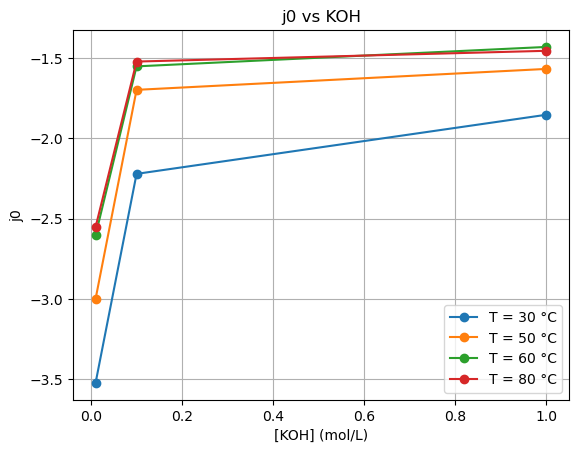

In [50]:
# === Plot 2: j0 vs KOH, color = T ===
plt.figure()
for T in T_vals:
    mask = X[:,0] == T
    plt.plot(X[mask, 1], y_log[mask], marker='o', label=f"T = {T} °C")
plt.xlabel("[KOH] (mol/L)")
plt.ylabel("j0")
plt.title("j0 vs KOH")
plt.legend()
plt.grid()

In [46]:
# === Fit polynomial regression to log(j0) ===
degrees = [1, 2, 3, 4, 5, 6, 7, 8]
mse_scores = {}

for deg in degrees:
    poly = PolynomialFeatures(degree=deg)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y_log)
    y_pred = model.predict(X_poly)
    mse = mean_squared_error(y_log, y_pred)
    mse_scores[deg] = mse

# Report interpolation errors
print("Log-domain interpolation errors:")
for deg, err in mse_scores.items():
    print(f"Degree {deg}: MSE = {err:.6e}")

# Choose best degree
best_deg = min(mse_scores, key=mse_scores.get)
print(f"\nBest degree: {best_deg}")

# Fit best model
poly = PolynomialFeatures(degree=best_deg)
X_poly = poly.fit_transform(X)
model = LinearRegression().fit(X_poly, y_log)

Log-domain interpolation errors:
Degree 1: MSE = 2.210823e-01
Degree 2: MSE = 3.717357e-03
Degree 3: MSE = 8.420012e-04
Degree 4: MSE = 7.287466e-04
Degree 5: MSE = 1.305698e-20
Degree 6: MSE = 1.497362e-21
Degree 7: MSE = 1.654264e-17
Degree 8: MSE = 2.007462e-16

Best degree: 6


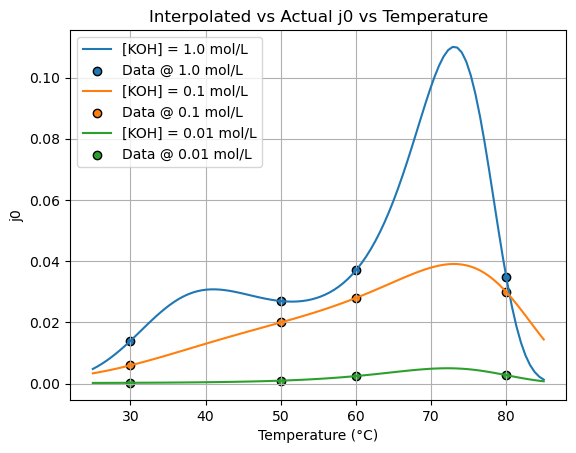

In [47]:
# === Plot: Interpolated vs Actual j0 vs Temperature (color = KOH) ===
plt.figure()
for koh in KOH_vals:
    T_line = np.linspace(25, 85, 100)
    KOH_line = np.full_like(T_line, koh)
    X_interp = np.column_stack((T_line, KOH_line))
    X_interp_poly = poly.transform(X_interp)
    y_interp_log = model.predict(X_interp_poly)
    y_interp = 10 ** y_interp_log  # back-transform to j0
    plt.plot(T_line, y_interp, label=f"[KOH] = {koh} mol/L")

    # Overlay original data
    mask = X[:, 1] == koh
    plt.scatter(X[mask, 0], y_an[mask], marker='o', edgecolors='k', label=f"Data @ {koh} mol/L")

plt.xlabel("Temperature (°C)")
plt.ylabel("j0")
plt.title("Interpolated vs Actual j0 vs Temperature")
plt.legend()
plt.grid()


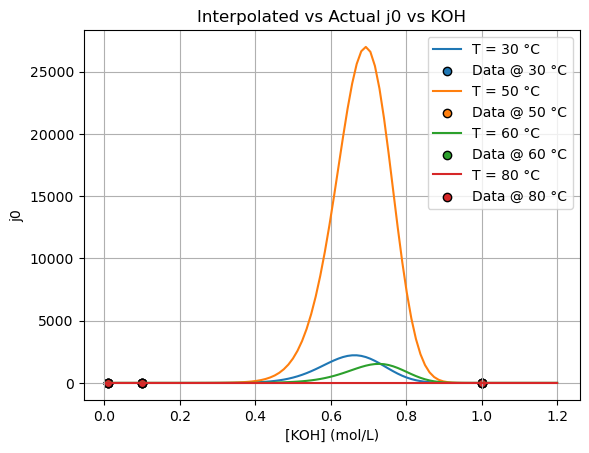

In [48]:
# === Plot: Interpolated vs Actual j0 vs KOH (color = T) ===
plt.figure()
for T in T_vals:
    KOH_line = np.linspace(0.005, 1.2, 100)
    T_line = np.full_like(KOH_line, T)
    X_interp = np.column_stack((T_line, KOH_line))
    X_interp_poly = poly.transform(X_interp)
    y_interp_log = model.predict(X_interp_poly)
    y_interp = 10 ** y_interp_log
    plt.plot(KOH_line, y_interp, label=f"T = {T} °C")

    # Overlay original data
    mask = X[:, 0] == T
    plt.scatter(X[mask, 1], y_an[mask], marker='o', edgecolors='k', label=f"Data @ {T} °C")

plt.xlabel("[KOH] (mol/L)")
plt.ylabel("j0")
plt.title("Interpolated vs Actual j0 vs KOH")
plt.legend()
plt.grid()

# Plolynomial

In [40]:
# === Try polynomial interpolation of different degrees ===
mse_scores = {}
degrees = [1, 2, 3, 4, 5, 6, 7, 8]

for deg in degrees:
    poly = PolynomialFeatures(degree=deg)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y_an)
    y_pred = model.predict(X_poly)
    mse = mean_squared_error(y_an, y_pred)
    mse_scores[deg] = mse

print("Interpolation errors:")
for deg, err in mse_scores.items():
    print(f"Degree {deg}: MSE = {err:.6e}")

best_deg = min(mse_scores, key=mse_scores.get)
print(f"\nBest degree: {best_deg}")

Interpolation errors:
Degree 1: MSE = 7.407175e-05
Degree 2: MSE = 1.387649e-05
Degree 3: MSE = 1.664893e-06
Degree 4: MSE = 6.862331e-08
Degree 5: MSE = 1.190690e-25
Degree 6: MSE = 5.054684e-26
Degree 7: MSE = 1.004324e-23
Degree 8: MSE = 1.766444e-23

Best degree: 6


In [41]:
# === Fit best model and make fine-grid predictions ===
poly = PolynomialFeatures(degree=best_deg)
X_poly = poly.fit_transform(X)
model = LinearRegression().fit(X_poly, y_an)

# Fine grid for 2D predictions
T_fine = np.array([30, 50, 60, 80])
KOH_fine = np.array([1.0, 0.1, 0.01])

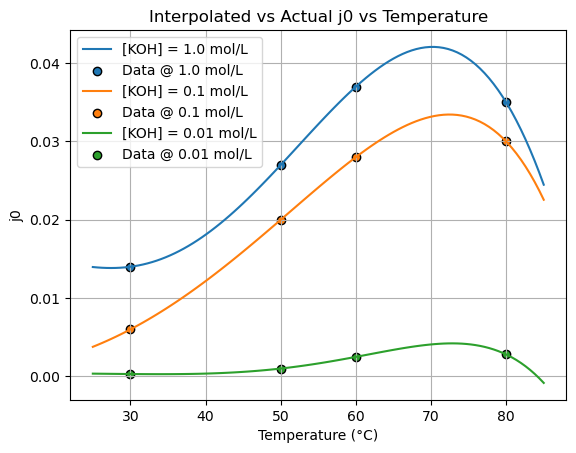

In [42]:
plt.figure()
for koh in KOH_fine:
    T_line = np.linspace(25, 85, 100)
    KOH_line = np.full_like(T_line, koh)
    X_interp = np.column_stack((T_line, KOH_line))
    X_interp_poly = poly.transform(X_interp)
    y_interp = model.predict(X_interp_poly)
    plt.plot(T_line, y_interp, label=f"[KOH] = {koh} mol/L")

    # Overlay original points for this KOH
    mask = X[:, 1] == koh
    plt.scatter(X[mask, 0], y_an[mask], marker='o', edgecolors='k', label=f"Data @ {koh} mol/L")

plt.xlabel("Temperature (°C)")
plt.ylabel("j0")
plt.title("Interpolated vs Actual j0 vs Temperature")
plt.legend()
plt.grid()


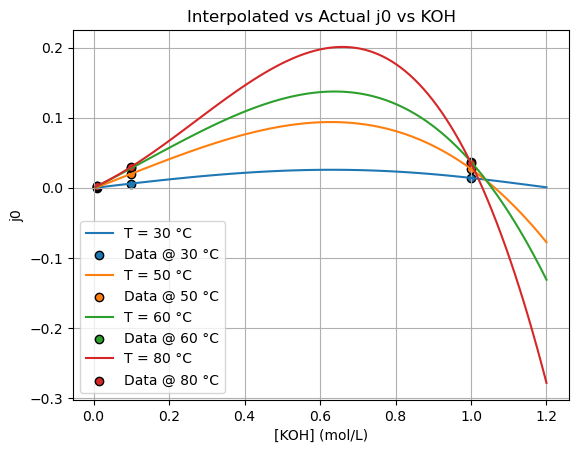

In [43]:
plt.figure()
for T in T_fine:
    KOH_line = np.linspace(0.005, 1.2, 100)
    T_line = np.full_like(KOH_line, T)
    X_interp = np.column_stack((T_line, KOH_line))
    X_interp_poly = poly.transform(X_interp)
    y_interp = model.predict(X_interp_poly)
    plt.plot(KOH_line, y_interp, label=f"T = {T} °C")

    # Overlay original points for this T
    mask = X[:, 0] == T
    plt.scatter(X[mask, 1], y_an[mask], marker='o', edgecolors='k', label=f"Data @ {T} °C")

plt.xlabel("[KOH] (mol/L)")
plt.ylabel("j0")
plt.title("Interpolated vs Actual j0 vs KOH")
plt.legend()
plt.grid()


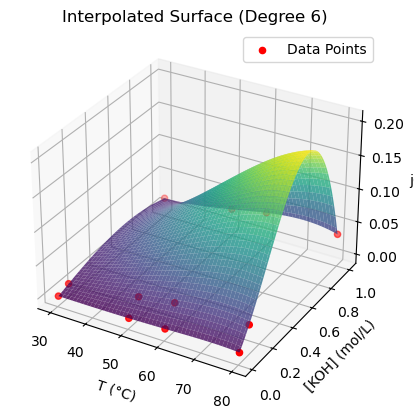

In [44]:
# === 3D Surface Plot ===
T_range = np.linspace(30, 80, 100)
KOH_range = np.linspace(0.01, 1.0, 100)
T_surf, KOH_surf = np.meshgrid(T_range, KOH_range)
X_surf = np.column_stack((T_surf.ravel(), KOH_surf.ravel()))
X_surf_poly = poly.transform(X_surf)
y_surf = model.predict(X_surf_poly).reshape(T_surf.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T_surf, KOH_surf, y_surf, cmap='viridis', alpha=0.8)
ax.scatter(X[:,0], X[:,1], y_an, color='r', label='Data Points')
ax.set_xlabel("T (°C)")
ax.set_ylabel("[KOH] (mol/L)")
ax.set_zlabel("j0")
ax.set_title(f"Interpolated Surface (Degree {best_deg})")
plt.legend()